In [32]:
% define a time window
t = 0:.001:.25;
t_long = 0:.001:1;

In [33]:
% make two sine waves
% a short version to make counting oscillations easier and
% a long version to make it easier to hear
sine1 = sin(2*pi*50*t);
sine2 = sin(2*pi*120*t);
sine1_long = sin(2*pi*50*t_long);
sine2_long = sin(2*pi*120*t_long);
%audiowrite('Sine_50.wav',sine1,44100)
%audiowrite('Sine_120.wav',sine2,44100)

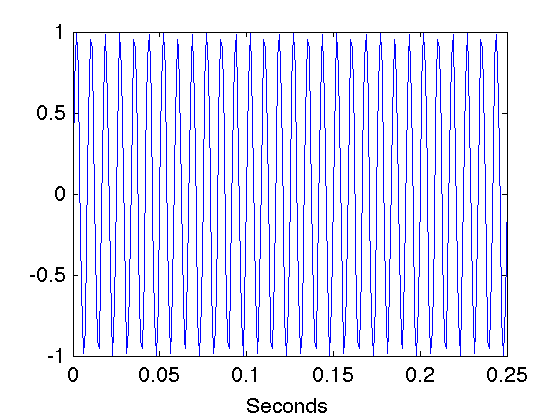

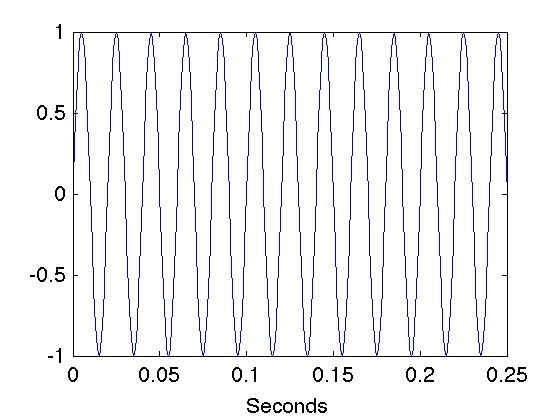

In [34]:
figure; plot(t,sine1); xlabel('Seconds')
figure; plot(t,sine2); xlabel('Seconds')

### Take a moment to figure out what the frequency of these sine waves is

#### Hint: remember that frequency is measured in Hz.

### Let's hear the sounds

In [35]:
% play sine1
sound(sine1_long)

In [36]:
% play sine2
sound(sine2_long)

### We can simply add the two sine waves together to get a new, more complex sound

In [37]:
% build a complex sound by adding sine1 and sine2
complex_sound = sine1 + sine2;


### Take a moment to think about what you might expect this wave to look like


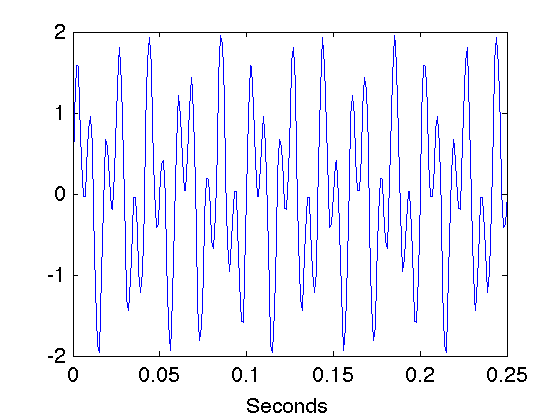

In [38]:
% plot complex_sound
figure; plot(t,complex_sound); xlabel('Seconds')

In [39]:
% play complex_sound
sound(complex_sound)

### We can make this sound more complex by adding some random noise

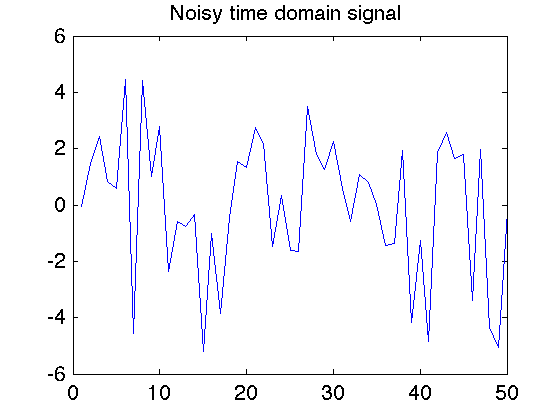

In [40]:
% add some random noise to complex_sound

noisy_sound = complex_sound + 2*randn(size(t));
figure; plot(noisy_sound(1:50))
title('Noisy time domain signal')

In [41]:
sound(noisy_sound)

### We can use the Fourier transform to decompose these sounds to their constituent elements

In [42]:
Y = fft(noisy_sound,251);
Y2 = fft(complex_sound,251);

% for lots more about Fourier transforms, try here: 
% http://nautil.us/blog/the-math-trick-behind-mp3s-jpegs-and-homer-simpsons-face

### Spectral density for complex_sound

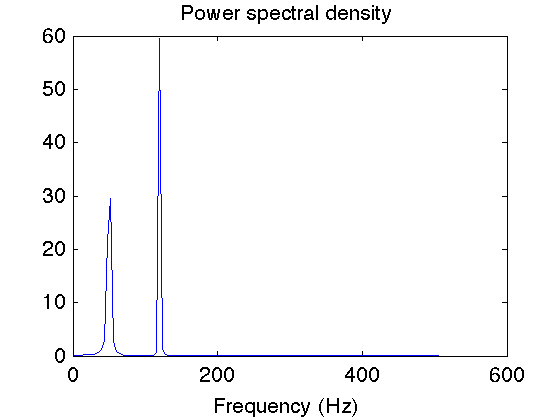

In [43]:
% Spectral density for complex_sound

% Compute the power spectral density, a measurement of the energy at various frequencies, using the complex conjugate (CONJ).
% Form a frequency axis for the first 127 points and use it to plot the result. (The remainder of the points are symmetric.)

Pyy = Y2.*conj(Y2)/251;
f = 1000/251*(0:127);
figure; plot(f,Pyy(1:128))
title('Power spectral density')
xlabel('Frequency (Hz)')

%%

### Spectral density for noisy_sound

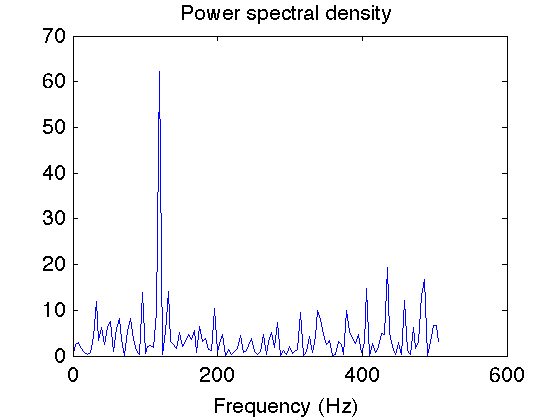

In [44]:
% Spectral density for noisy_sound

% Compute the power spectral density, a measurement of the energy at various frequencies, using the complex conjugate (CONJ).
% Form a frequency axis for the first 127 points and use it to plot the result. (The remainder of the points are symmetric.)

Pyy = Y.*conj(Y)/251;
f = 1000/251*(0:127);
figure; plot(f,Pyy(1:128))
title('Power spectral density')
xlabel('Frequency (Hz)')

### The basic elements of the sound are still the same

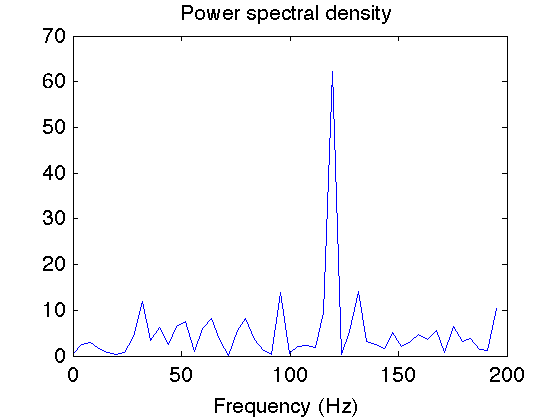

In [45]:
%%
% Zoom in to plot up to 200 Hz
figure; plot(f(1:50),Pyy(1:50))
title('Power spectral density')
xlabel('Frequency (Hz)')

In [46]:
%clear all

### Let's try with a *real* phoneme!

In [47]:
% Let's try with a *real* phoneme!

[Y_a, Fs_a] = audioread('vowel_a.wav');

In [48]:
sound(Y_a, Fs_a);

In [49]:
len = length(Y_a);
Y = fft(Y_a,len);

### Spectral density for "a"

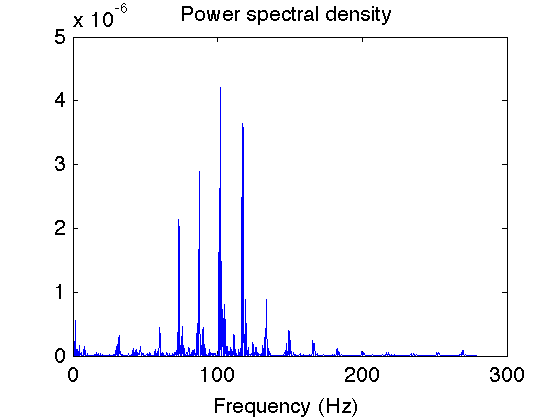

In [50]:
% Spectral density for "a"

% Compute the power spectral density, a measurement of the energy at various frequencies, using the complex conjugate (CONJ).
% Form a frequency axis for the first 127 points and use it to plot the result. (The remainder of the points are symmetric.)

Pyy = Y_a.*conj(Y_a)/len;
f = 1000/len*(0:8000);
figure; plot(f,Pyy(1:8001)); 
title('Power spectral density')
xlabel('Frequency (Hz)')